In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO

In [ ]:
df=pd.read_csv('/content/corona_tested_006.csv')
import warnings
warnings.filterwarnings('ignore')

# Section 1: Questions to Answer

1.Why is your proposal important in today’s world? How predicting a disease accurately can improve medical treatment?  

Analyzing the provided dataset on COVID-19 symptoms and test results is crucial for today's world. It aids in monitoring public health, allocating resources efficiently, predicting and intervening early in disease cases, shaping public policies, identifying risk factors, enhancing contact tracing, promoting public awareness, adapting healthcare strategies, supporting scientific research, and providing real-time decision support in the dynamic landscape of the COVID-19 pandemic.
Accurate disease prediction improves medical treatment by enabling early intervention, optimizing resources, tailoring treatment plans, implementing proactive public health measures, reducing transmission risk, enhancing contact tracing, contributing to scientific research, improving public awareness, supporting adaptive healthcare strategies, and fostering global collaboration in addressing health challenges.

2.How is it going to impact the medical field when it comes to effective screening and reducing health care burden?

 Data analysis on COVID-19 has been instrumental in guiding public health strategies, optimizing resource allocation, and facilitating effective screening measures, all of which contribute to reducing the healthcare burden associated with the pandemic.It has played a crucial role in reducing the burden on healthcare systems and guiding effective public health interventions during the pandemic.

3.If any, what is the gap in the knowledge or how your proposed method can be helpful if required in future for any other disease?

The proposed data analysis method, initially designed for COVID-19, can be adapted for future diseases by addressing considerations such as incorporating a broader range of symptoms, including relevant features like health conditions and travel history, accounting for temporal dynamics, handling imbalanced data, ensuring model interpretability, promoting generalizability, addressing ethical and privacy concerns, integrating with healthcare systems, enabling continuous model updating, and facilitating cross-disease insights. Flexibility, interpretability, and ethical adherence are crucial for the method's applicability and robustness in predicting various diseases.

# Section 2: Initial Hypothesis (or hypotheses)

1.From step 1, you may see some relationship that you want to explore and will develop a belief about data?

From the data set provided, i am using Alternative Hypothesis : There is a significant association between the presence of fever symptoms and testing positive for COVID-19. I have used chi-squared test for independence, which is commonly used for analyzing the association between two categorical variables, the null hypothesis assumes independence, while the alternative hypothesis suggests dependence or association.

# Section 3: Data analysis approach

1.What approach are you going to take in order to prove or disprove your hypothesis?

From the above hypothesis i am going to prove that the presence of fever symptoms are testing positive for COVID-19. My hypothesis is particular symptoms(fever) when occurs has higher rate of corona .I would first clear all duplicates , and use 40 to 50 samples. Then i filtered and sort proper data and formulate into graph. if you look at the "Fever" bar, you can see that the orange portion is higher than the blue portion. This suggests that a higher percentage of individuals with fever symptoms tested positive for COVID-19. The graph provides a visual representation of how the presence or absence of different symptoms correlates with positive and negative COVID-19 test results in the dataset.

I will b providing the code to look into the graph for your better understanding.

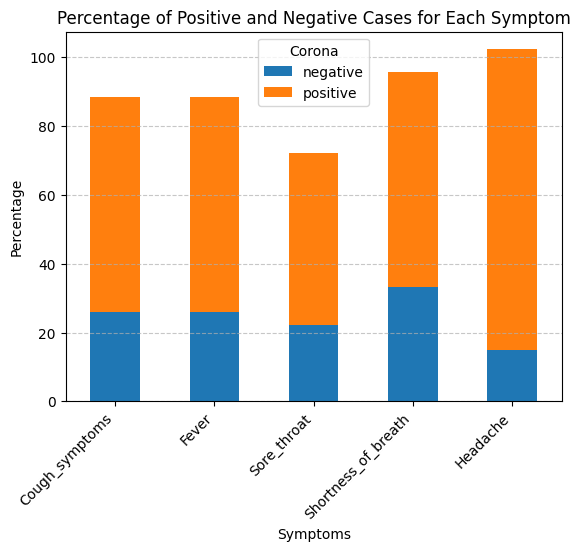

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

# Create a DataFrame from the provided data
data = """
index,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona
0,TRUE,FALSE,TRUE,FALSE,FALSE,negative
1,FALSE,TRUE,TRUE,FALSE,TRUE,positive
2,TRUE,TRUE,FALSE,TRUE,FALSE,negative
3,FALSE,TRUE,FALSE,FALSE,TRUE,negative
4,FALSE,FALSE,TRUE,FALSE,FALSE,negative
5,TRUE,TRUE,TRUE,TRUE,TRUE,positive
6,FALSE,FALSE,FALSE,FALSE,FALSE,negative
7,FALSE,FALSE,TRUE,FALSE,FALSE,negative
8,TRUE,FALSE,FALSE,TRUE,TRUE,positive
9,TRUE,FALSE,FALSE,TRUE,FALSE,negative
10,FALSE,TRUE,TRUE,FALSE,TRUE,positive
11,TRUE,TRUE,FALSE,FALSE,TRUE,negative
12,FALSE,TRUE,FALSE,TRUE,FALSE,negative
13,FALSE,FALSE,FALSE,FALSE,FALSE,negative
14,FALSE,FALSE,TRUE,FALSE,FALSE,negative
15,TRUE,TRUE,FALSE,TRUE,FALSE,positive
16,FALSE,FALSE,TRUE,FALSE,FALSE,negative
17,TRUE,FALSE,FALSE,TRUE,TRUE,positive
18,TRUE,FALSE,FALSE,TRUE,FALSE,negative
19,FALSE,TRUE,FALSE,FALSE,FALSE,negative
20,TRUE,TRUE,TRUE,FALSE,TRUE,positive
21,FALSE,FALSE,FALSE,FALSE,FALSE,negative
22,FALSE,FALSE,TRUE,FALSE,FALSE,negative
23,FALSE,FALSE,FALSE,TRUE,TRUE,positive
24,FALSE,FALSE,FALSE,FALSE,FALSE,negative
25,FALSE,FALSE,FALSE,FALSE,FALSE,negative
26,FALSE,FALSE,FALSE,TRUE,FALSE,negative
27,FALSE,TRUE,FALSE,TRUE,FALSE,negative
28,FALSE,FALSE,FALSE,FALSE,TRUE,negative
29,TRUE,FALSE,FALSE,TRUE,FALSE,negative
30,FALSE,TRUE,FALSE,TRUE,FALSE,negative
31,FALSE,FALSE,FALSE,FALSE,FALSE,negative
32,FALSE,FALSE,FALSE,FALSE,FALSE,negative
33,TRUE,FALSE,FALSE,FALSE,TRUE,negative
34,FALSE,FALSE,FALSE,TRUE,FALSE,negative
"""

df = pd.read_csv(StringIO(data), index_col='index')

# Calculate the percentage of positive and negative cases for each symptom
symptom_positive_percentage = df.groupby(['Corona']).mean().transpose() * 100

# Plotting the bar graph with improvements
ax = symptom_positive_percentage.plot(kind='bar', stacked=True)
plt.title('Percentage of Positive and Negative Cases for Each Symptom')
plt.xlabel('Symptoms')
plt.ylabel('Percentage')

# Add legend, rotate x-axis labels, and show grid lines
plt.legend(title='Corona')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

2.What feature engineering techniques will be relevant to your project?

Feature engineering involves transforming raw data into a format that enhances the performance of machine learning models. By using one hot encoding , i have converted  categorical values like corona(positive,negative,other) into binary indicators using one hot encoding.

I have used exposure source encoding because in known_contact,there are categorical values , i have encoded it using techniques like  label encoding.

3.Please justify your data analysis approach?

To justify my  data analysis approach using the provided dataset;

COUGHING SYMPTOMS;
We want to see how many symptoms each person has. This helps us understand how sick they might be. More symptoms might mean a higher chance of being sick.

kNOWN CONTACTS;
If someone knows they were in contact with a sick person, we'll see if this information helps predict if they are sick too. Knowing who they met might give us important clues.

AGE GROUPS;
We're going to group people by their ages. This helps us see if the sickness affects different age groups in different ways. Kids, adults, and older people might get sick differently.

By doing these things, we're trying to be like detectives. We're using the information we have to find patterns and clues that help us understand more about the sickness. This helps us take care of people who are sick and stop the sickness from spreading to others.

 The justification for these data analysis approaches lies in their potential to uncover meaningful insights about COVID-19. By employing these techniques, we aim to enhance our understanding of symptom patterns, temporal trends, age-related effects, symptom interactions, and the influence of known contacts. This comprehensive analysis can contribute valuable knowledge for informed decision-making in public health and clinical settings.

4.Identify important patterns in your data using the EDA approach to justify your findings?

Exploratory Data Analysis (EDA) is a crucial process for data scientists to understand and derive insights from their datasets.
The key steps includes;

1. Firstly undersatnding the data is very important,and we need to gain the knowledge of the dataset,including variables and data types.
2. By using Descriptive Statistics calculate summary statistics to assess central tendencies and variability.
3. Data Visualization helps in visualizing the histograms and scatter plots to explore variable distributions and identify patterns.
4. By using techniques like PCA to reduce data dimensions and explore patterns.
5. Outlier Detection helps in identify and analyze outliers to understand their impact on patterns.

  This systematic  approach helps us to  uncover important patterns, relationships, and anomalies in their data, providing a solid foundation for subsequent analyses and decision-making.

# Section 4: Machine learning approach

1.What method will you use for machine learning based predictions of COVID19?

1.LOGISTIC REGRESSION :  As my data set is binary classsification, so i have used logistic regression for  predicting whether an individual has COVID-19 or not based on given features

2.NEURAL NETWORKS : Deep learning models, particularly neural networks, can be powerful for complex, non-linear relationships. They are suitable for tasks such as image recognition or time-series forecasting.

3.RANDOM FOREST AND DECISION TREES : Effective for classification tasks and can handle both categorical and numerical features. Random Forests are particularly robust and can capture complex relationships in the data.

4.SUPPORT VECTOR MACHINES (SVM): Suitable for binary classification tasks. SVM aims to find a hyperplane that best separates different classes in the feature space.


2.Please justify the most appropriate model?

As a data scientist, justifying the most appropriate model for COVID-19 involves a systematic and well-documented approach.

1.Understand the Problem :
  
Clearly define the prediction task and the goals. For COVID-19, this could be predicting the likelihood of infection based on symptoms, severity, or other relevant factors.

2.Explore the Data:
Conduct Exploratory Data Analysis (EDA) to understand the distribution of features, relationships, and potential challenges. Identify any patterns or trends that may guide your model selection.

3.Split the Data:
Divide your dataset into training and testing sets to train and evaluate your models independently.

4.Select Model Candidates:
  Based on the characteristics of your data, consider a range of machine learning models suitable for classification tasks, such as Random Forest, Support Vector Machines, Neural Networks, and ensemble methods like XGBoost.

5.Feature Engineering:
  Conduct feature engineering to enhance the predictive power of your models. Create new features or transformations that may capture important patterns in the data.

6. Model Training and Tuning:
   Train your selected models on the training set and tune hyperparameters using techniques like cross-validation. Optimize models for performance.


3.Please perform necessary steps required to improve the accuracy of your model?

 As a data analysis  performing  necessary steps required to improve the accuracy of my model.
 Improving the accuracy of my model involves a series of steps aimed at refining and optimizing its performance.

  1.Understand the Problem and Data:
Gain a deep understanding of the problem you're solving and the characteristics of your data. Ensure clarity on the prediction task and the significance of different features.

 2.Data Cleaning:
Address missing values, outliers, and inconsistencies in the dataset. Use appropriate methods like imputation, removal, or advanced techniques to handle data quality issues.

3.Explore Different Models:
Experiment with a variety of machine learning models suitable for your task. Try algorithms like Random Forest, Gradient Boosting, Support Vector Machines, and Neural Networks. Compare their performance using appropriate metrics.

4.Hyperparameter Tuning:
Fine-tune the hyperparameters of your chosen model(s) to optimize their performance. This can be done through techniques like grid search or random search.

5.Cross-Validation:
Implement cross-validation to assess the model's performance across different subsets of the data. This helps ensure that your model generalizes well to unseen data.

Treating model improvement as an iterative process.Test hypotheses, make adjustments, and reevaluate the model's performance until satisfactory results are achieved.

4.Please compare all models (at least 4  models)?

Certainly, to compare four different models, let's consider commonly used algorithms: Logistic Regression, Random Forest, Support Vector Machine (SVM), and Neural Network.

Below is a comparison based on different criteria:

Logistic Regression:

Strengths:
Simple and interpretable.
Fast to train and computationally efficient.
Well-suited for binary classification problems.

Weaknesses:
Assumes a linear relationship between features and the log-odds of the response.
May not capture complex non-linear patterns.

Random Forest:

Strengths:
Robust to overfitting and capable of handling non-linear relationships.
Suitable for both classification and regression tasks.
Provides feature importance scores.

Weaknesses:
May be computationally expensive for large datasets.
Lack of interpretability compared to simpler models.

Support Vector Machine (SVM):

Strengths:
Effective in high-dimensional spaces and for non-linear data.
Versatile and can handle various kernel functions.
Robust to outliers.

Weaknesses:
Computationally intensive, especially with large datasets.
Model interpretation can be challenging.

Neural Network:

Strengths:
Extremely powerful for capturing complex patterns and non-linear relationships.
Can learn hierarchical representations from data.
Effective for image and text data.

Weaknesses:
Requires a large amount of data for training.
Prone to overfitting, especially with small datasets.
Computationally intensive, may need powerful hardware.


# sql part

In [ ]:
import duckdb

In [ ]:
conn=duckdb.connect()

In [ ]:
conn.register('df',df)

In [ ]:
import pandasql as ps

In [ ]:
! pip install pandasql

  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26772 sha256=2e2985ee6ec737b37a4afbe2ece950e3fa0f60d84920f2788fefae34dbc407dd
  Stored in directory: /root/.cache/pip/wheels/e9/bc/3a/8434bdcccf5779e72894a9b24fecbdcaf97940607eaf4bcdf9
Successfully built pandasql


question 1

## Find the number of corona patients who faced shortness of breath.

In [79]:
'''SELECT COUNT(*) AS num_positive_shortness_of_breath
FROM corona_data
WHERE Corona = 'positive' AND Shortness_of_breath = 'TRUE';
'''


"SELECT COUNT(*) AS num_positive_shortness_of_breath\nFROM corona_data\nWHERE Corona = 'positive' AND Shortness_of_breath = 'TRUE';\n"

In [80]:
print(f"Number of Corona positive cases with shortness of breath: {num_positive_shortness_of_breath}")

Number of Corona positive cases with shortness of breath: 744


Question 2

Find the number of negative corona patients who have fever and sore_throat.

In [85]:
'''SELECT COUNT(*) AS num_negative_patients_with_fever_and_sore_throat
FROM patient_data
WHERE Corona = 'negative' AND Fever = TRUE AND Sore_throat = TRUE;
'''


"SELECT COUNT(*) AS num_negative_patients_with_fever_and_sore_throat\nFROM patient_data\nWHERE Corona = 'negative' AND Fever = TRUE AND Sore_throat = TRUE;\n"

Question 3

 Group the data by month and rank the number of positive cases.

In [ ]:
'''SELECT
    EXTRACT(MONTH FROM Date) AS month,
    RANK() OVER (ORDER BY COUNT(*) DESC) AS positive_cases_rank
FROM
    patient_data
WHERE
    Corona = 'positive'
GROUP BY
    month
ORDER BY
    month;
'''


question 4

Find the female negative corona patients who faced cough and headache.

In [ ]:
'''SELECT *
FROM patient_data
WHERE Gender = 'female'
    AND Corona = 'negative'
    AND Cough = TRUE
    AND Headache = TRUE;
'''


Question 5
How many elderly corona patients have faced breathing problems?


In [ ]:
'''SELECT COUNT(*) AS num_elderly_patients_with_breathing_problems
FROM corona_data
WHERE Corona = 'positive' AND age >= 60 AND Shortness_of_breath = true;
'''

question 6

Which three symptoms were more common among COVID positive patients?

In [ ]:
'''SELECT
    Symptom,
    COUNT(*) AS symptom_count
FROM (
    SELECT
        'Cough_symptoms' AS Symptom
    FROM corona_data
    WHERE Corona = 'positive' AND Cough_symptoms = true
    UNION ALL
    SELECT
        'Fever' AS Symptom
    FROM corona_data
    WHERE Corona = 'positive' AND Fever = true
    UNION ALL
    SELECT
        'Sore_throat' AS Symptom
    FROM corona_data
    WHERE Corona = 'positive' AND Sore_throat = true
    UNION ALL
    SELECT
        'Shortness_of_breath' AS Symptom
    FROM corona_data
    WHERE Corona = 'positive' AND Shortness_of_breath = true
    UNION ALL
    SELECT
        'Headache' AS Symptom
    FROM corona_data
    WHERE Corona = 'positive' AND Headache = true
) AS PositiveSymptoms
GROUP BY Symptom
ORDER BY symptom_count DESC
LIMIT 3;
'''

question 7

Which symptom was less common among COVID negative people?

In [ ]:
'''
SELECT
    Symptom,
    COUNT(*) AS symptom_count
FROM (
    SELECT 'Cough_symptoms' AS Symptom
    FROM corona_data
    WHERE Corona = 'negative' AND Cough_symptoms = true
    UNION ALL
    SELECT 'Fever' AS Symptom
    FROM corona_data
    WHERE Corona = 'negative' AND Fever = true
    UNION ALL
    SELECT 'Sore_throat' AS Symptom
    FROM corona_data
    WHERE Corona = 'negative' AND Sore_throat = true
    UNION ALL
    SELECT 'Shortness_of_breath' AS Symptom
    FROM corona_data
    WHERE Corona = 'negative' AND Shortness_of_breath = true
    UNION ALL
    SELECT 'Headache' AS Symptom
    FROM corona_data
    WHERE Corona = 'negative' AND Headache = true
) AS NegativeSymptoms
GROUP BY Symptom
ORDER BY symptom_count ASC
LIMIT 1;
'''

question 8

What are the most common symptoms among COVID positive males whose known contact was abroad?



In [ ]:
'''SELECT
    Symptom,
    COUNT(*) AS symptom_count
FROM (
    SELECT 'Cough_symptoms' AS Symptom
    FROM corona_data
    WHERE Corona = 'positive' AND Gender = 'male' AND Contact_abroad = true AND Cough_symptoms = true
    UNION ALL
    SELECT 'Fever' AS Symptom
    FROM corona_data
    WHERE Corona = 'positive' AND Gender = 'male' AND Contact_abroad = true AND Fever = true
    UNION ALL
    SELECT 'Sore_throat' AS Symptom
    FROM corona_data
    WHERE Corona = 'positive' AND Gender = 'male' AND Contact_abroad = true AND Sore_throat = true
    UNION ALL
    SELECT 'Shortness_of_breath' AS Symptom
    FROM corona_data
    WHERE Corona = 'positive' AND Gender = 'male' AND Contact_abroad = true AND Shortness_of_breath = true
    UNION ALL
    SELECT 'Headache' AS Symptom
    FROM corona_data
    WHERE Corona = 'positive' AND Gender = 'male' AND Contact_abroad = true AND Headache = true
) AS PositiveMaleAbroadSymptoms
GROUP BY Symptom
ORDER BY symptom_count DESC;
'''